In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [2]:
train_data = pd.read_csv('zhengqi_train.txt',sep='\t')
test_data = pd.read_csv('zhengqi_test.txt',sep='\t')

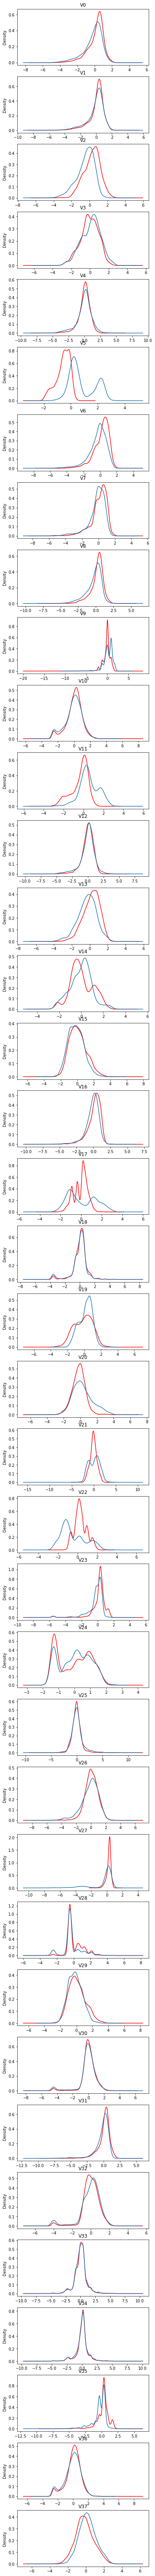

In [3]:
# 绘制train和test属性分布。剔除分布差异较大的属性
plt.figure(figsize=[6,120])
for i in range(38):
    ax = plt.subplot(38,1,i+1)
    pd.DataFrame(train_data).iloc[:,i].plot(kind='kde',ax=ax,color="red")
    pd.DataFrame(test_data).iloc[:,i].plot(kind='kde',ax=ax)
    ax.set_title(test_data.columns[i])

In [4]:
# 通过观察，删除分布差异较大的属性
drop_columns = ['V5','V11','V13','V14','V17','V19','V20', 'V21', 'V22', 'V27','V35']
train_data.drop(columns=drop_columns,inplace=True)
test_data.drop(columns=drop_columns,inplace=True)

In [5]:
# 查看各个属性之间的相关性
t = train_data.corr()
t

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,...,V28,V29,V30,V31,V32,V33,V34,V36,V37,target
V0,1.000000,0.908607,0.463643,0.409576,0.781212,0.189267,0.141294,0.794013,0.077888,0.298443,...,0.035119,0.302145,0.156968,0.675003,0.050951,0.056439,-0.019342,0.231417,-0.494076,0.873212
V1,0.908607,1.000000,0.506514,0.383924,0.657790,0.276805,0.205023,0.874650,0.138849,0.310120,...,0.077346,0.147096,0.175997,0.769745,0.085604,0.035129,-0.029115,0.235299,-0.494043,0.871846
V2,0.463643,0.506514,1.000000,0.410148,0.057697,0.615938,0.477114,0.703431,0.047874,0.346006,...,0.229575,-0.275764,0.175943,0.653764,0.033942,0.050309,-0.025620,0.316462,-0.734956,0.638878
V3,0.409576,0.383924,0.410148,1.000000,0.315046,0.233896,0.197836,0.411946,-0.063717,0.321262,...,0.159039,0.117610,0.043966,0.421954,-0.092423,-0.007159,-0.031898,0.324475,-0.229613,0.512074
V4,0.781212,0.657790,0.057697,0.315046,1.000000,-0.117529,-0.052370,0.449542,-0.031816,0.141129,...,-0.044620,0.659093,0.022807,0.447016,-0.026186,0.062367,0.028659,0.113609,-0.031054,0.603984
V6,0.189267,0.276805,0.615938,0.233896,-0.117529,1.000000,0.917502,0.468233,0.450096,0.415660,...,0.093427,-0.467980,0.188907,0.546535,0.144550,0.054210,-0.002914,0.433804,-0.404817,0.370037
V7,0.141294,0.205023,0.477114,0.197836,-0.052370,0.917502,1.000000,0.389987,0.446611,0.310982,...,0.058800,-0.311363,0.170113,0.475254,0.122707,0.034508,-0.019103,0.340479,-0.292285,0.287815
V8,0.794013,0.874650,0.703431,0.411946,0.449542,0.468233,0.389987,1.000000,0.100672,0.419703,...,0.122050,-0.011091,0.150258,0.878072,0.038430,0.026843,-0.036297,0.326586,-0.553121,0.831904
V9,0.077888,0.138849,0.047874,-0.063717,-0.031816,0.450096,0.446611,0.100672,1.000000,0.120208,...,-0.064595,-0.221623,0.293026,0.121712,0.289891,0.115655,0.094856,0.129542,-0.112503,0.139704
V10,0.298443,0.310120,0.346006,0.321262,0.141129,0.415660,0.310982,0.419703,0.120208,1.000000,...,0.056484,-0.105042,-0.036705,0.560213,-0.093213,0.016739,-0.026994,0.922190,-0.045851,0.394767


In [6]:
# 删除相关性较低的属性
drop_columns = t[(np.abs(t["target"])<0.15)].index
train_data.drop(columns=drop_columns,inplace=True)
test_data.drop(columns=drop_columns,inplace=True)

In [7]:
# 数据分割
X = train_data.iloc[:,:-1]
y = train_data['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [8]:
# 生成训练数据
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [9]:
# 设置参数
params = {
            'task': 'train',
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': {'l2', 'auc'},
            'num_leaves':31 ,
            'learning_rate': 0.01,
            'feature_fraction': 0.9,
            'bagging_fraction': 0.8,
            'bagging_freq': 2,
            'header': True
            }

In [ ]:
# 训练模型
gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=5000,
                    valid_sets=lgb_eval,
                    early_stopping_rounds=200)

[1]	valid_0's l2: 1.00843	valid_0's auc: 0.94497
Training until validation scores don't improve for 200 rounds
[2]	valid_0's l2: 0.991742	valid_0's auc: 0.952347
[3]	valid_0's l2: 0.974938	valid_0's auc: 0.952646
[4]	valid_0's l2: 0.958607	valid_0's auc: 0.950974
[5]	valid_0's l2: 0.942753	valid_0's auc: 0.951489
[6]	valid_0's l2: 0.926737	valid_0's auc: 0.9518
[7]	valid_0's l2: 0.911564	valid_0's auc: 0.951667
[8]	valid_0's l2: 0.896827	valid_0's auc: 0.952373
[9]	valid_0's l2: 0.882248	valid_0's auc: 0.952939
